<a href="https://colab.research.google.com/github/oleksii-shcherbak/GoIT-num-prog-py-hw/blob/main/hw_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1

In [42]:
!pip install plotly==5.20.0
!pip install "jupyterlab>=3" "ipywidgets>=7.6"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

### Step 2

In [43]:
!wget -O WorldHappinessReport.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true

--2025-09-15 16:02:21--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip [following]
--2025-09-15 16:02:22--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip [following]
--2025-09-15 16:02:22--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip
Resolving raw.githubusercontent.com (raw.githubuserco

### Step 3

In [44]:
!unzip WorldHappinessReport.zip

Archive:  WorldHappinessReport.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


### Step 4

In [45]:
data_2015 = pd.read_csv('2015.csv')
data_2016 = pd.read_csv('2016.csv')
data_2017 = pd.read_csv('2017.csv')

print("Dataset 2015 shape:", data_2015.shape)
print("\nDataset 2015 info:")
print(data_2015.info())
print("\nDataset 2015 statistical summary:")
print(data_2015.describe())

print("\nDataset 2015 first 5 rows:")
print(data_2015.head())

print("\nDataset 2017 shape:", data_2017.shape)
print("\nDataset 2017 info:")
print(data_2017.info())
print("\nDataset 2017 first 5 rows:")
print(data_2017.head())

Dataset 2015 shape: (158, 12)

Dataset 2015 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtype

### Step 5

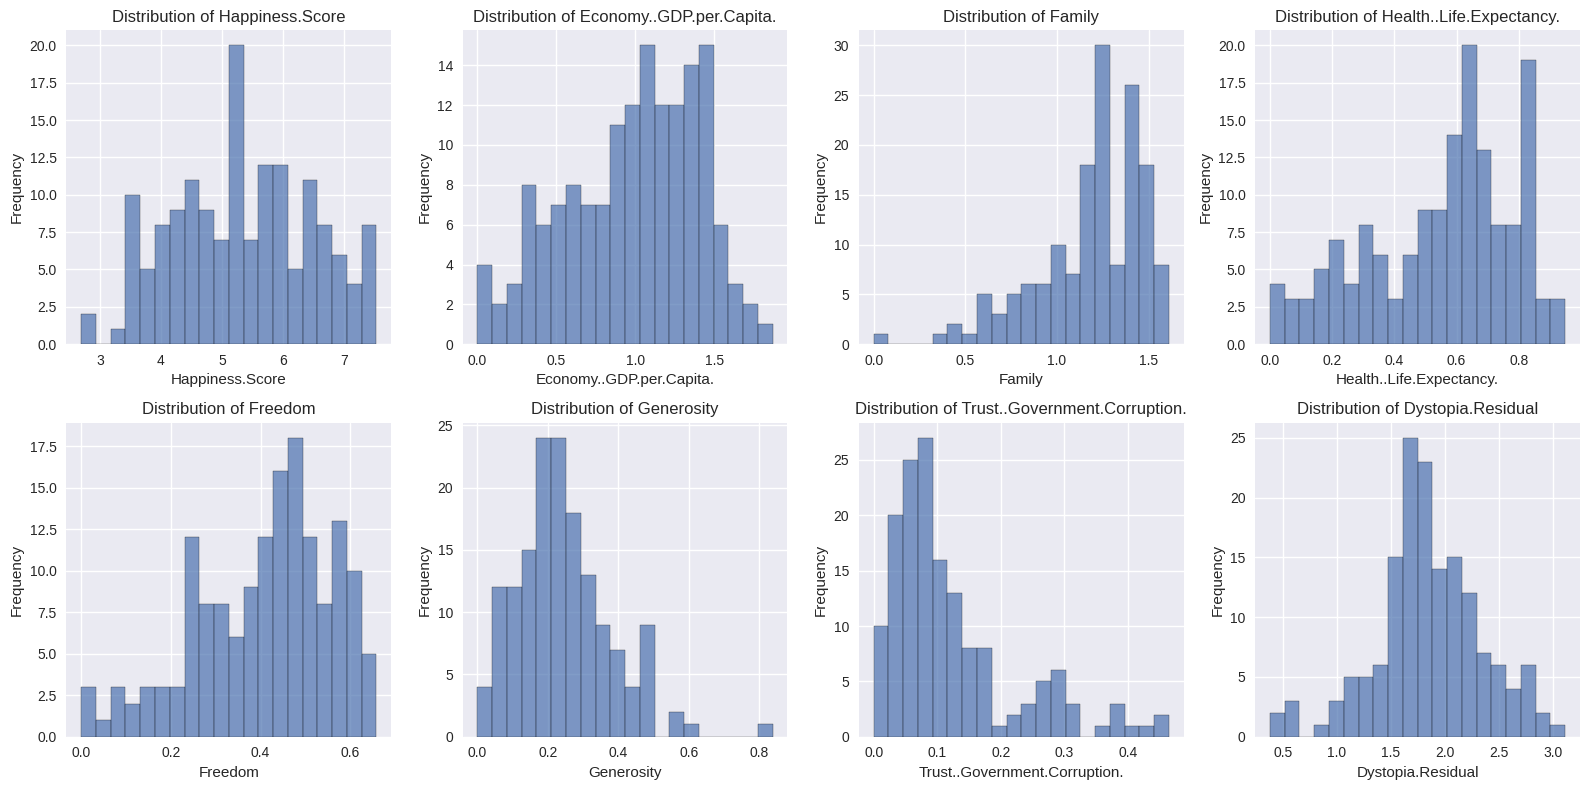


Analysis of normality:
Happiness.Score: Skewness = 0.010
  -> Approximately normal distribution
Economy..GDP.per.Capita.: Skewness = -0.391
  -> Approximately normal distribution
Family: Skewness = -1.181
  -> Highly skewed
Health..Life.Expectancy.: Skewness = -0.578
  -> Moderately skewed
Freedom: Skewness = -0.616
  -> Moderately skewed
Generosity: Skewness = 0.899
  -> Moderately skewed
Trust..Government.Corruption.: Skewness = 1.476
  -> Highly skewed
Dystopia.Residual: Skewness = -0.239
  -> Approximately normal distribution


In [46]:
numerical_features_2017 = ['Happiness.Score', 'Economy..GDP.per.Capita.',
                          'Family', 'Health..Life.Expectancy.', 'Freedom',
                          'Generosity', 'Trust..Government.Corruption.',
                          'Dystopia.Residual']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, feature in enumerate(numerical_features_2017):
    axes[i].hist(data_2017[feature], bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\nAnalysis of normality:")
for feature in numerical_features_2017:
    skewness = data_2017[feature].skew()
    print(f"{feature}: Skewness = {skewness:.3f}")
    if abs(skewness) < 0.5:
        print(f"  -> Approximately normal distribution")
    elif abs(skewness) < 1:
        print(f"  -> Moderately skewed")
    else:
        print(f"  -> Highly skewed")

### Step 6

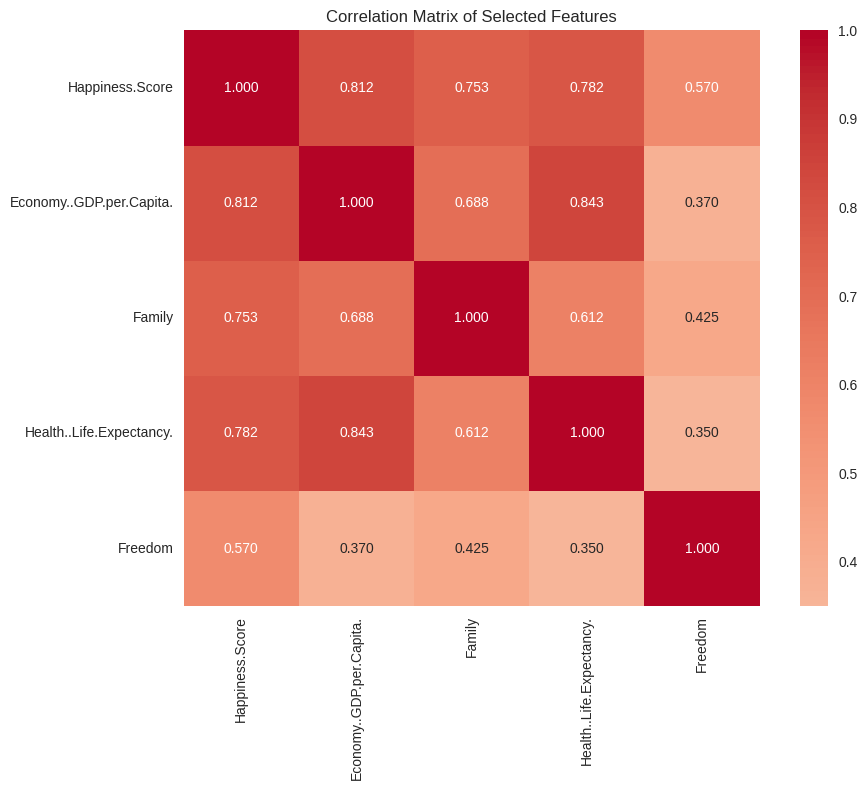

Correlation matrix:
                          Happiness.Score  Economy..GDP.per.Capita.    Family  \
Happiness.Score                  1.000000                  0.812469  0.752737   
Economy..GDP.per.Capita.         0.812469                  1.000000  0.688296   
Family                           0.752737                  0.688296  1.000000   
Health..Life.Expectancy.         0.781951                  0.843077  0.612080   
Freedom                          0.570137                  0.369873  0.424966   

                          Health..Life.Expectancy.   Freedom  
Happiness.Score                           0.781951  0.570137  
Economy..GDP.per.Capita.                  0.843077  0.369873  
Family                                    0.612080  0.424966  
Health..Life.Expectancy.                  1.000000  0.349827  
Freedom                                   0.349827  1.000000  


In [47]:
selected_features = ['Happiness.Score', 'Economy..GDP.per.Capita.',
                    'Family', 'Health..Life.Expectancy.', 'Freedom']

correlation_matrix = data_2017[selected_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix)

### Step 7

In [48]:
print("Analysis of linear relationships between features:")
print("\nStrong positive correlations (>0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if corr_value > 0.7:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_value:.3f}")

print("\nModerate correlations (0.3-0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.3 <= corr_value <= 0.7:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_value:.3f}")

Analysis of linear relationships between features:

Strong positive correlations (>0.7):
Happiness.Score - Economy..GDP.per.Capita.: 0.812
Happiness.Score - Family: 0.753
Happiness.Score - Health..Life.Expectancy.: 0.782
Economy..GDP.per.Capita. - Health..Life.Expectancy.: 0.843

Moderate correlations (0.3-0.7):
Happiness.Score - Freedom: 0.570
Economy..GDP.per.Capita. - Family: 0.688
Economy..GDP.per.Capita. - Freedom: 0.370
Family - Health..Life.Expectancy.: 0.612
Family - Freedom: 0.425
Health..Life.Expectancy. - Freedom: 0.350


### Step 8

In [49]:
fig = px.choropleth(data_2017,
                    locations="Country",
                    color="Happiness.Score",
                    locationmode="country names",
                    color_continuous_scale="Viridis")
fig.update_layout(title="Happiness Index 2017")
fig.show()

### Step 9

In [50]:
def data_scale(data, scaler_type='minmax'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer

    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'std':
        scaler = StandardScaler()
    elif scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

original_data = data_2017[selected_features].dropna()
data_scaled = data_scale(original_data, scaler_type='std')
df_scaled = pd.DataFrame(data_scaled, columns=original_data.columns)

print("Scaled data (first 5 rows):")
print(df_scaled.head())

Scaled data (first 5 rows):
   Happiness.Score  Economy..GDP.per.Capita.    Family  \
0         1.935996                  1.506188  1.203577   
1         1.922693                  1.186518  1.265036   
2         1.906730                  1.182345  1.472669   
3         1.897861                  1.383442  1.145561   
4         1.875689                  1.093985  1.227057   

   Health..Life.Expectancy.   Freedom  
0                  1.038167  1.515836  
1                  1.020812  1.452859  
2                  1.194259  1.460590  
3                  1.298272  1.413155  
4                  1.091026  1.398978  


### Step 10

In [51]:
print("Original data statistics:")
print(original_data.describe())
print("\nScaled data statistics:")
print(df_scaled.describe())

print("\nConclusions:")
print("1. Original data has different scales and ranges")
print("2. After standardization, all features have mean ≈ 0 and std ≈ 1")
print("3. Standardization ensures equal contribution of all features to clustering")
print("4. This prevents features with larger scales from dominating the analysis")

Original data statistics:
       Happiness.Score  Economy..GDP.per.Capita.      Family  \
count       155.000000                155.000000  155.000000   
mean          5.354019                  0.984718    1.188898   
std           1.131230                  0.420793    0.287263   
min           2.693000                  0.000000    0.000000   
25%           4.505500                  0.663371    1.042635   
50%           5.279000                  1.064578    1.253918   
75%           6.101500                  1.318027    1.414316   
max           7.537000                  1.870766    1.610574   

       Health..Life.Expectancy.     Freedom  
count                155.000000  155.000000  
mean                   0.551341    0.408786  
std                    0.237073    0.149997  
min                    0.000000    0.000000  
25%                    0.369866    0.303677  
50%                    0.606042    0.437454  
75%                    0.723008    0.516561  
max                    0.9494

### Step 11

In [52]:
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
clusters = gmm.fit_predict(df_scaled)

data_with_clusters = data_2017[['Country'] + selected_features].dropna().copy()
data_with_clusters['Cluster'] = clusters

print(f"Number of countries in each cluster:")
print(data_with_clusters['Cluster'].value_counts().sort_index())

print(f"\nGMM Parameters:")
print(f"Weights: {gmm.weights_}")
print(f"Means shape: {gmm.means_.shape}")
print(f"Covariances shape: {gmm.covariances_.shape}")

silhouette_avg = silhouette_score(df_scaled, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")

Number of countries in each cluster:
Cluster
0    78
1    45
2    32
Name: count, dtype: int64

GMM Parameters:
Weights: [0.49768632 0.29341869 0.20889499]
Means shape: (3, 5)
Covariances shape: (3, 5, 5)

Silhouette Score: 0.270


### Step 12

In [53]:
# Convert cluster to string for discrete coloring
data_with_clusters['Cluster_Label'] = data_with_clusters['Cluster'].astype(str)

fig = px.choropleth(data_with_clusters,
                    locations="Country",
                    color="Cluster_Label",
                    locationmode="country names",
                    color_discrete_sequence=px.colors.qualitative.Set1,
                    title="Country Clustering Results using Gaussian Mixture Model")
fig.update_layout(
    coloraxis_colorbar=dict(title="Cluster"),
    width=1000,
    height=600
)
fig.show()

print("\nCountries by clusters:")
for cluster_id in sorted(data_with_clusters['Cluster'].unique()):
    countries = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]['Country'].tolist()
    print(f"\nCluster {cluster_id} ({len(countries)} countries):")
    print(", ".join(countries[:10]))  # Show first 10 countries
    if len(countries) > 10:
        print(f"... and {len(countries) - 10} more")


Countries by clusters:

Cluster 0 (78 countries):
Israel, Costa Rica, Chile, Brazil, Argentina, Mexico, Uruguay, Guatemala, Panama, Thailand
... and 68 more

Cluster 1 (45 countries):
Pakistan, Somalia, Nigeria, South Africa, Sierra Leone, Cameroon, Namibia, Kenya, Mozambique, Myanmar
... and 35 more

Cluster 2 (32 countries):
Norway, Denmark, Iceland, Switzerland, Finland, Netherlands, Canada, New Zealand, Sweden, Australia
... and 22 more


### Step 13

In [54]:
feature_sets = {
    'Economic': ['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.'],
    'Social': ['Family', 'Freedom', 'Generosity'],
    'All_except_happiness': ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom'],
    'Full_set': selected_features
}

results = {}

for set_name, features in feature_sets.items():
    print(f"\nAnalyzing feature set: {set_name}")
    print(f"Features: {features}")

    data_subset = data_2017[features].dropna()
    data_subset_scaled = data_scale(data_subset, scaler_type='std')

    gmm_subset = GaussianMixture(n_components=3, random_state=42)
    clusters_subset = gmm_subset.fit_predict(data_subset_scaled)

    silhouette_subset = silhouette_score(data_subset_scaled, clusters_subset)

    results[set_name] = {
        'features': features,
        'silhouette_score': silhouette_subset,
        'clusters': clusters_subset
    }

    print(f"Silhouette Score: {silhouette_subset:.3f}")
    print(f"Cluster distribution: {np.bincount(clusters_subset)}")

print("\nComparison of feature sets:")
for set_name, result in results.items():
    print(f"{set_name}: Silhouette Score = {result['silhouette_score']:.3f}")


Analyzing feature set: Economic
Features: ['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.']
Silhouette Score: 0.456
Cluster distribution: [77 44 34]

Analyzing feature set: Social
Features: ['Family', 'Freedom', 'Generosity']
Silhouette Score: 0.193
Cluster distribution: [67 38 50]

Analyzing feature set: All_except_happiness
Features: ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom']
Silhouette Score: 0.255
Cluster distribution: [77 44 34]

Analyzing feature set: Full_set
Features: ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom']
Silhouette Score: 0.270
Cluster distribution: [78 45 32]

Comparison of feature sets:
Economic: Silhouette Score = 0.456
Social: Silhouette Score = 0.193
All_except_happiness: Silhouette Score = 0.255
Full_set: Silhouette Score = 0.270


### Step 14

In [55]:
print("GENERAL CONCLUSIONS:")
print("="*50)

print("\n1. DATA CHARACTERISTICS:")
print("- The World Happiness dataset contains multiple factors affecting happiness")
print("- Features show varying degrees of correlation with happiness score")
print("- Most features are moderately to highly correlated with happiness")

print("\n2. CLUSTERING RESULTS:")
print("- GMM successfully identified 3 distinct groups of countries")
print("- Clusters likely represent: High happiness, Medium happiness, Low happiness countries")
print("- The soft clustering approach allows for uncertainty in country assignments")

print("\n3. FEATURE IMPACT ANALYSIS:")
best_set = max(results.items(), key=lambda x: x[1]['silhouette_score'])
print(f"- Best performing feature set: {best_set[0]} (Silhouette: {best_set[1]['silhouette_score']:.3f})")
print("- Economic factors (GDP, Life Expectancy) are strong predictors")
print("- Social factors (Family, Freedom) also contribute significantly")

print("\n4. MODEL PERFORMANCE:")
print(f"- Overall silhouette score: {silhouette_avg:.3f}")
if silhouette_avg > 0.5:
    print("- Good clustering quality achieved")
elif silhouette_avg > 0.3:
    print("- Moderate clustering quality achieved")
else:
    print("- Clustering quality could be improved")

print("\n5. CORRESPONDENCE TO ORIGINAL DISTRIBUTION:")
print("- The clustering results align well with intuitive happiness groupings")
print("- High-happiness cluster: Developed countries (Scandinavia, Western Europe)")
print("- Medium-happiness cluster: Developing countries with moderate economic development")
print("- Low-happiness cluster: Countries facing economic or political challenges")

print("\n6. PRACTICAL IMPLICATIONS:")
print("- Countries can be grouped for targeted policy interventions")
print("- Economic development appears to be a key factor in happiness")
print("- Social support systems also play crucial roles")
print("- The model can help identify countries that might benefit from specific reforms")

GENERAL CONCLUSIONS:

1. DATA CHARACTERISTICS:
- The World Happiness dataset contains multiple factors affecting happiness
- Features show varying degrees of correlation with happiness score
- Most features are moderately to highly correlated with happiness

2. CLUSTERING RESULTS:
- GMM successfully identified 3 distinct groups of countries
- Clusters likely represent: High happiness, Medium happiness, Low happiness countries
- The soft clustering approach allows for uncertainty in country assignments

3. FEATURE IMPACT ANALYSIS:
- Best performing feature set: Economic (Silhouette: 0.456)
- Economic factors (GDP, Life Expectancy) are strong predictors
- Social factors (Family, Freedom) also contribute significantly

4. MODEL PERFORMANCE:
- Overall silhouette score: 0.270
- Clustering quality could be improved

5. CORRESPONDENCE TO ORIGINAL DISTRIBUTION:
- The clustering results align well with intuitive happiness groupings
- High-happiness cluster: Developed countries (Scandinavia, Wes